In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score, r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
from sklearn.inspection import PartialDependenceDisplay
from sklearn.metrics import precision_recall_fscore_support
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import shap
import sweetviz as sv
from sklearn.preprocessing import MultiLabelBinarizer
import streamlit.components.v1 as components
shap.initjs()

In [2]:
# Load Data
Churn_Test = pd.read_csv("C:/Users/jmedinamartinez/OneDrive - IESEG/Documents/Comunication Skills Project/Data/churn_test.csv")
Churn_Train = pd.read_csv("C:/Users/jmedinamartinez/OneDrive - IESEG/Documents/Comunication Skills Project/Data/churn_train.csv")


In [49]:
my_report = sv.analyze(Churn_Train)

                                             |                                             | [  0%]   00:00 ->…

In [56]:
my_report.show_html(filepath='C:/Users/jmedinamartinez/OneDrive - IESEG/Documents/Comunication Skills Project/Data/EDA.html', open_browser=False, layout='vertical', scale=1.0)
components.iframe(src='http://localhost:3001/EDA.html', width=1100, height=1200, scrolling=True)


2021-11-19 20:46:18.895 
  command:

    streamlit run C:\tools\Anaconda3\envs\py\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


Report C:/Users/jmedinamartinez/OneDrive - IESEG/Documents/Comunication Skills Project/Data/EDA.html was generated.


DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

churn
no     3652
yes     598
Name: state, dtype: int64

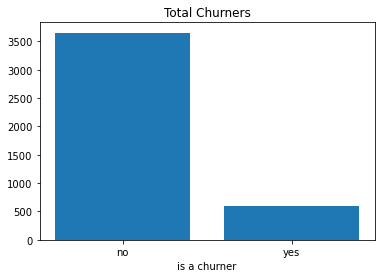

In [4]:
Total_Churners =  Churn_Train.groupby("churn").count()
Total_Churners 
fig, ax = plt.subplots()  
plt.bar(Total_Churners.index, Total_Churners["state"])
plt.title("Total Churners")
plt.xlabel('is a churner')
Total_Churners["state"]


international_plan
no     3854
yes     396
Name: state, dtype: int64

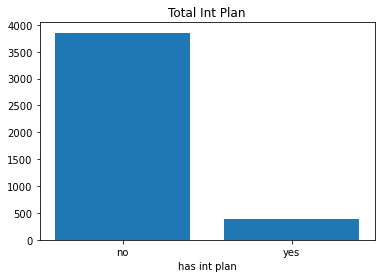

In [5]:
Total_Churners =  Churn_Train.groupby("international_plan").count()
Total_Churners 
fig, ax = plt.subplots()  
plt.bar(Total_Churners.index, Total_Churners["state"])
plt.title("Total Int Plan")
plt.xlabel('has int plan')
Total_Churners["state"]

In [6]:
Top_States =  Churn_Train.groupby("state").count()

Top_States= Top_States.sort_values("account_length", ascending = False)

Top_States= Top_States.iloc[:5,:1]
Top_States.rename(columns={"account_length": "Count"}, inplace=True)
Top_States




,Count
state,
WV,139
MN,108
ID,106
AL,101
VA,100


In [7]:
# Label Encoder Churn
le_churn = LabelEncoder()
Churn_Train["churn"] = le_churn.fit_transform(Churn_Train["churn"])

# Label Encoder international_plan
le_international_plan = LabelEncoder()
Churn_Train["international_plan"] = le_international_plan.fit_transform(Churn_Train["international_plan"])

# Label Encoder voice_mail_plan
le_voice_mail_plan = LabelEncoder()
Churn_Train["voice_mail_plan"] = le_voice_mail_plan.fit_transform(Churn_Train["voice_mail_plan"])

# Label Encoder area_code
le_area_code = LabelEncoder()
Churn_Train["area_code"] = le_area_code.fit_transform(Churn_Train["area_code"])

# Label Encoder area_code
le_state = LabelEncoder()
Churn_Train["state"] = le_state.fit_transform(Churn_Train["state"])

In [8]:
# Label Encoder international_plan
le_international_plan = LabelEncoder()
Churn_Test["international_plan"] = le_international_plan.fit_transform(Churn_Test["international_plan"])

# Label Encoder voice_mail_plan
le_voice_mail_plan = LabelEncoder()
Churn_Test["voice_mail_plan"] = le_voice_mail_plan.fit_transform(Churn_Test["voice_mail_plan"])

# Label Encoder area_code
le_area_code = LabelEncoder()
Churn_Test["area_code"] = le_area_code.fit_transform(Churn_Test["area_code"])

# Label Encoder area_code
le_state = LabelEncoder()
Churn_Test["state"] = le_state.fit_transform(Churn_Test["state"])

In [9]:
# Feature Variables Creation
features = ['state', 
            'account_length', 
            'area_code', 
            'international_plan', 
            'voice_mail_plan', 
            'number_vmail_messages', 
            'total_day_minutes', 
            'total_day_calls', 
            'total_day_charge', 
            'total_eve_minutes', 
            'total_eve_calls', 
            'total_eve_charge', 
            'total_night_minutes', 
            'total_night_calls', 
            'total_night_charge', 
            'total_intl_minutes', 
            'total_intl_calls', 
            'total_intl_charge', 
            'number_customer_service_calls']

In [10]:
# split data in train and test (stratify y)
X, y = Churn_Train[features], Churn_Train["churn"]
X = sm.add_constant(X)

X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, test_size=0.2, random_state=42)


# Logistic Regression

In [11]:
logreg = sm.Logit(y_train,X_train).fit()
logreg.summary()

Optimization terminated successfully.
         Current function value: 0.306639
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  churn   No. Observations:                 3400
Model:                          Logit   Df Residuals:                     3380
Method:                           MLE   Df Model:                           19
Date:                Fri, 19 Nov 2021   Pseudo R-squ.:                  0.2448
Time:                        19:43:50   Log-Likelihood:                -1042.6
converged:                       True   LL-Null:                       -1380.5
Covariance Type:            nonrobust   LLR p-value:                4.666e-131
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            -8.4310      0.738    -11.420      0.000      -9.878      -6.984
state                             0.0031      0.004      0.790      0.429      -0.005       0.011
account_length                    0.0006      0.001      0.450      0.653      -0.002       0.003
area_code                         0.0105      0.080      0.131      0.896      -0.147       0.168
international_plan                2.2476      0.151     14.842      0.000       1.951       2.544
voice_mail_plan                  -2.5100      0.627     -4.002      0.000      -3.739      -1.281
number_vmail_messages             0.0474      0.019      2.443      0.015       0.009       0.085
total_day_minutes                 6.9570      3.353      2.075      0.038       0.386      13.528
total_day_calls                  -0.0006      0.003     -0.196      0.845      -0.006       0.005
total_day_charge                -40.8390     19.722     -2.071      0.038     -79.493      -2.185
total_eve_minutes                -0.8078      1.672     -0.483      0.629      -4.085       2.469
total_eve_calls                  -0.0005      0.003     -0.190      0.850      -0.006       0.005
total_eve_charge                  9.5892     19.670      0.488      0.626     -28.962      48.141
total_night_minutes               0.2785      0.891      0.313      0.755      -1.468       2.025
total_night_calls                -0.0025      0.003     -0.900      0.368      -0.008       0.003
total_night_charge               -6.0996     19.802     -0.308      0.758     -44.912      32.712
total_intl_minutes                0.1383      5.375      0.026      0.979     -10.396      10.673
total_intl_calls                 -0.0489      0.024     -2.033      0.042      -0.096      -0.002
total_intl_charge                -0.2138     19.908     -0.011      0.991     -39.233      38.805
number_customer_service_calls     0.5579      0.041     13.730      0.000       0.478       0.637
=================================================================================================
"""

In [12]:
# Predict
pred_trainLG = logreg.predict(X_train)
pred_testLG = logreg.predict(X_test)

# Evaluate predictions
acc_train = accuracy_score(y_train, np.round(pred_trainLG))
acc_test = accuracy_score(y_test, np.round(pred_testLG))

print(f"Train:\tACC={acc_train:.4f}")
print(f"Test:\tACC={acc_test:.4f}")

Train:	ACC=0.8691
Test:	ACC=0.8565


In [13]:
# evaluate predictions
y_train.head()

3835    0
1518    1
1704    0
3808    0
1448    0
Name: churn, dtype: int32

# Neural Network

In [14]:
mlp = MLPClassifier(hidden_layer_sizes=(32, 16), batch_size=32, early_stopping=False, random_state=42)

mlp = mlp.fit(X_train, y_train)

In [15]:
# predict probabilities
pred_trainNR = mlp.predict_proba(X_train)
pred_testNR = mlp.predict_proba(X_test)

# evaluate predictions
acc_train = accuracy_score(y_train, np.argmax(pred_trainNR, axis=1))
acc_test = accuracy_score(y_test, np.argmax(pred_testNR, axis=1))

print(f"Train:\tACC={acc_train:.4f}")
print(f"Test:\tACC={acc_test:.4f}")

Train:	ACC=0.8926
Test:	ACC=0.8824


# Random Forest

In [16]:

# define model
rf = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)
rf.fit(X_train,y_train)


RandomForestClassifier(max_depth=3, random_state=42)

In [17]:
# predict probabilities
pred_train = rf.predict(X_train)
pred_test = rf.predict_proba(X_test)

# evaluate predictions
acc_train = accuracy_score(y_train, pred_train)
acc_test = accuracy_score(y_test, np.argmax(pred_test, axis=1))

print(f"Train:\tACC={acc_train:.4f}")
print(f"Test:\tACC={acc_test:.4f}")

Train:	ACC=0.8874
Test:	ACC=0.8894


In [18]:
# Extract feature importance
print(rf.feature_importances_)

# nicely formatted
pd.DataFrame(rf.feature_importances_, index=X.columns, columns=["Feature importance"]).sort_values(by= "Feature importance", ascending = False)

[0.         0.00445366 0.00501141 0.00067479 0.12373148 0.02716082
 0.02663942 0.26231992 0.00371104 0.20800827 0.02915821 0.00359155
 0.03172565 0.01085424 0.0040148  0.00837481 0.0183042  0.02190935
 0.0207424  0.18961397]


,Feature importance
total_day_minutes,0.262320
total_day_charge,0.208008
number_customer_service_calls,0.189614
international_plan,0.123731
total_eve_charge,0.031726
total_eve_minutes,0.029158
voice_mail_plan,0.027161
number_vmail_messages,0.026639
total_intl_calls,0.021909
total_intl_charge,0.020742


In [19]:
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                            Specs        Score
7               total_day_minutes  3186.752474
6           number_vmail_messages  1012.645374
9                total_day_charge   541.695120
10              total_eve_minutes   333.275929
4              international_plan   258.635794
19  number_customer_service_calls   229.385859
13            total_night_minutes   116.902273
5                 voice_mail_plan    41.242485
12               total_eve_charge    28.325522
2                  account_length    25.086950


## Compare Models

In [20]:
#PARTIAL DEPENDENCE PLOT

In [21]:
Churn_Test = Churn_Test[features]

In [22]:
Churn_Test = sm.add_constant(Churn_Test)
pred_testT = mlp.predict(Churn_Test)
#pred_testT = pred_testT[:,1:]


In [23]:
Churn_TestPred = pd.concat([Churn_Test, pd.DataFrame(pred_testT)], axis=1)
Churn_TestPred.columns = [*Churn_TestPred.columns[:-1], 'Churn']
Churn_TestPred

,const,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,Churn
0,1.0,16,128,1,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,1.0,1,118,2,1,0,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,0
2,1.0,12,62,1,0,0,0,120.7,70,20.52,...,76,26.11,203.0,99,9.14,13.1,6,3.54,4,0
3,1.0,46,93,2,0,0,0,190.7,114,32.42,...,111,18.55,129.6,121,5.83,8.1,3,2.19,3,0
4,1.0,29,174,1,0,0,0,124.3,76,21.13,...,112,23.55,250.7,115,11.28,15.5,5,4.19,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,1.0,10,130,1,0,0,0,119.4,99,20.30,...,97,19.24,202.7,111,9.12,11.3,7,3.05,0,0
746,1.0,47,73,0,0,0,0,177.2,118,30.12,...,84,22.99,241.8,112,10.88,12.3,2,3.32,3,0
747,1.0,49,152,1,0,0,0,184.2,90,31.31,...,73,21.83,213.6,113,9.61,14.7,2,3.97,3,0
748,1.0,7,61,1,0,0,0,140.6,89,23.90,...,128,14.69,212.4,97,9.56,13.6,4,3.67,1,0


In [24]:
#X,y =Churn_Test,pred_testT

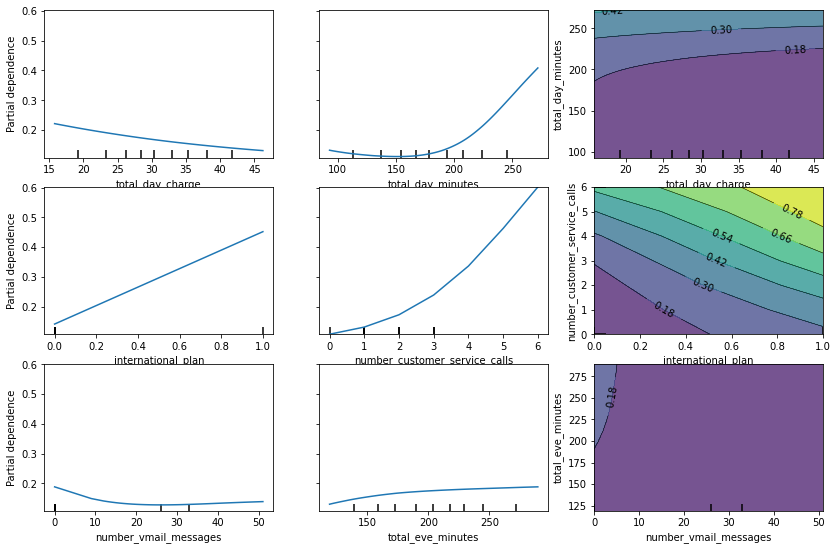

In [25]:
fig, ax = plt.subplots(figsize=(12, 8))
PartialDependenceDisplay.from_estimator(estimator=mlp, X=Churn_Test, features=[9, 7, (9, 7),4, 19, (4,19), 6, 10, (6,10)], ax=ax)
fig.tight_layout(pad=2.0)

# ICE

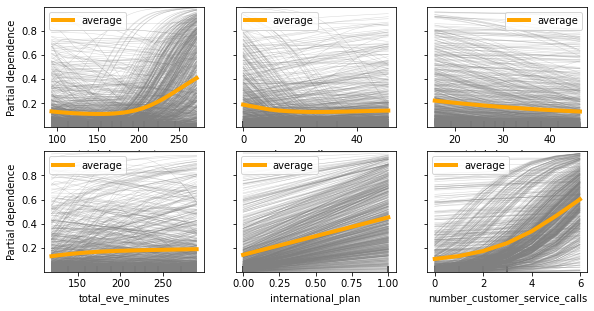

In [26]:
# target 0

fig, ax = plt.subplots(figsize=(8, 4))
fig.tight_layout(pad=0.1)
ice = PartialDependenceDisplay.from_estimator(estimator=mlp,
                        X=Churn_Test,
                        features=[7,6,9,10,4,19],
                        target=0,
                        kind="both",
                        ice_lines_kw={"color":"#808080","alpha": 0.3, "linewidth": 0.5},
                        pd_line_kw={"color": "#ffa500", "linewidth": 4, "alpha":1},
                        # centered=True, # will be added in the future
                        ax=ax)


# Shapley values

In [27]:
#Churn_TestX = Churn_Test.iloc[:,1:]


In [28]:
#X_test1 = X_test.iloc[:,[4,19,7,6,9,10]]

In [29]:
#X_test1

In [30]:
# Feature Variables Creation
features_Sel = ['international_plan', 
            'number_vmail_messages', 
            'total_day_minutes', 
            'total_day_charge', 
            'total_eve_minutes', 
            'number_customer_service_calls']

In [34]:
mlp = MLPClassifier(hidden_layer_sizes=(32, 16), batch_size=32, early_stopping=False, random_state=42)

mlp = mlp.fit(X_train[features_Sel], y_train)
# set up explainer for ".predict" method
explainer = shap.Explainer(mlp.predict,X_test[features_Sel] )

# compute shap values
shap_values = explainer(Churn_Test[features_Sel])

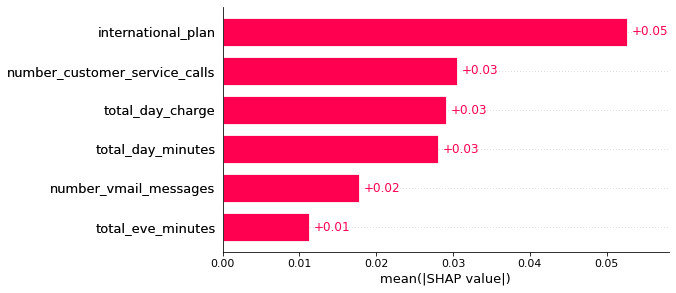

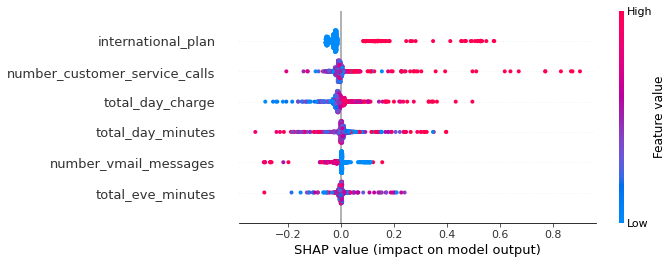

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [35]:
# feature importance (global)

# bar chart
shap.plots.bar(shap_values)

# individual dots for each instance
shap.plots.beeswarm(shap_values)

# split population in distinct groups (uses sklearn DecisionTree)
shap.plots.bar(shap_values.cohorts(2).abs.mean(0))

In [ ]:
#Churn_Test

In [ ]:
#y_train

In [36]:
# initialize explainer

mlp = MLPClassifier(hidden_layer_sizes=(32, 16), batch_size=32, early_stopping=False, random_state=42)

mlp = mlp.fit(X_train[features_Sel], y_train)

In [37]:
# initialize explainer


#mlp = mlp.fit(X_train[features_Sel], y_train)
explainer = shap.KernelExplainer(mlp.predict_proba,X_test[features_Sel])
shap_values = explainer.shap_values(Churn_Test[features_Sel])

X does not have valid feature names, but MLPClassifier was fitted with feature names
Using 850 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/750 [00:00<?, ?it/s]

X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted

X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted

X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted

X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted

X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted

X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted

X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted

X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted

X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted

X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted

X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted

X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted

X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted

X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted

X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted

X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted

In [ ]:
#mlp

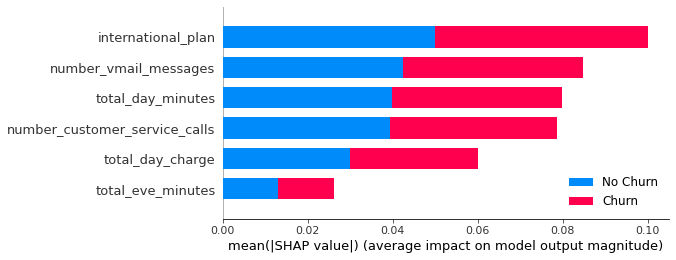

In [38]:
# feature importance (global)

# average shapley values 
shap.summary_plot(shap_values, Churn_Test[features_Sel], class_names=["No Churn", "Churn"])

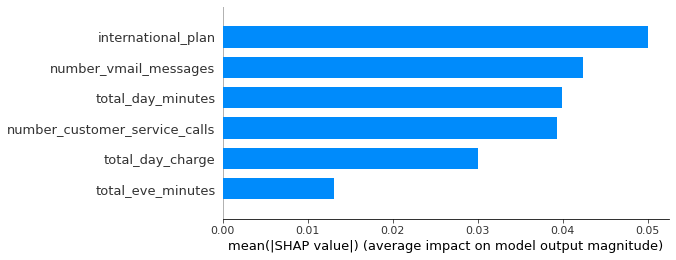

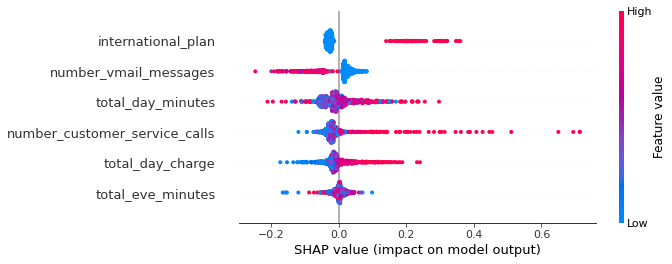

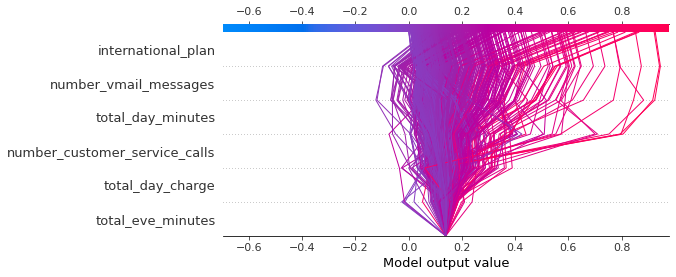

In [39]:
# feature importance for a specific target class

target =1  # (Churn)

# distribution of shapley values for target
shap.summary_plot(shap_values[target], Churn_Test[features_Sel], plot_type="bar")
shap.summary_plot(shap_values[target], Churn_Test[features_Sel], plot_type="dot")

# decision plot for target
shap.decision_plot(explainer.expected_value[target], shap_values[target],Churn_Test[features_Sel])

# force plot for target
shap.force_plot(explainer.expected_value[target], shap_values[target],Churn_Test[features_Sel])

In [40]:
sample_CSC= Churn_TestPred[Churn_TestPred["number_customer_service_calls"]>4]
sample_CSCX= Churn_TestPred[Churn_TestPred["number_customer_service_calls"]>4]

In [41]:
sample_CSC= sample_CSC.loc[:,:"number_customer_service_calls"]
sample_CSCX

,const,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,Churn
9,1.0,13,119,1,0,0,0,159.1,114,27.05,...,117,19.66,143.2,91,6.44,8.8,3,2.38,5,0
10,1.0,50,87,1,0,0,0,151.0,83,25.67,...,116,18.67,203.9,127,9.18,9.7,3,2.62,5,1
22,1.0,34,75,1,0,1,21,175.8,97,29.89,...,106,18.49,237.5,134,10.69,5.3,4,1.43,5,0
50,1.0,6,96,1,0,1,37,172.7,93,29.36,...,116,10.21,216.1,86,9.72,10.3,5,2.78,5,1
121,1.0,44,68,1,0,0,0,162.1,86,27.56,...,86,13.18,189.7,87,8.54,11.0,9,2.97,5,1
141,1.0,47,103,1,0,0,0,204.9,107,34.83,...,102,11.49,208.2,106,9.37,10.4,3,2.81,5,1
149,1.0,2,118,1,0,0,0,267.8,145,45.53,...,121,26.89,208.6,91,9.39,14.4,11,3.89,5,0
183,1.0,44,105,1,0,0,0,106.4,71,18.09,...,83,20.41,147.7,114,6.65,5.3,4,1.43,6,1
186,1.0,10,132,1,0,0,0,193.3,106,32.86,...,94,10.91,162.1,119,7.29,11.6,4,3.13,5,1
203,1.0,42,17,2,0,1,31,153.1,115,26.03,...,59,15.80,224.3,102,10.09,10.0,1,2.70,6,1


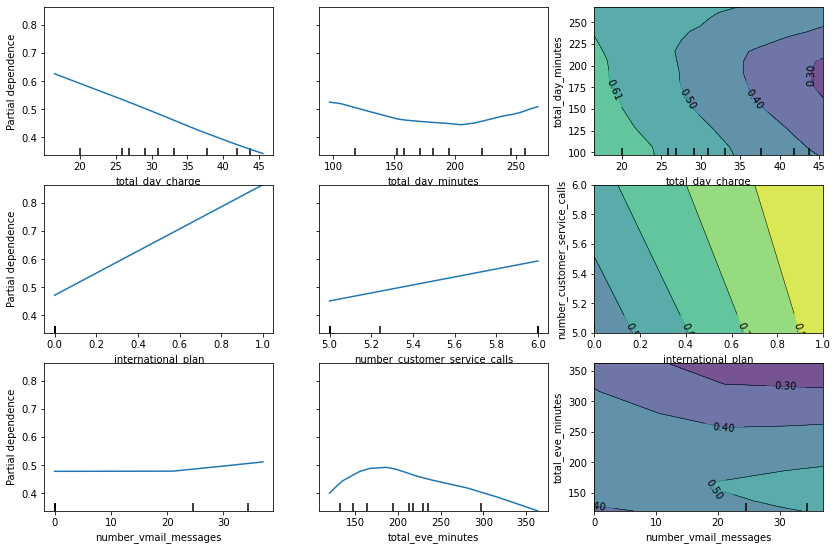

In [42]:
mlp = MLPClassifier(hidden_layer_sizes=(32, 16), batch_size=32, early_stopping=False, random_state=42)

mlp = mlp.fit(X_train, y_train)
fig, ax = plt.subplots(figsize=(12, 8))
PartialDependenceDisplay.from_estimator(estimator=mlp, X=sample_CSC, features=[9, 7, (9, 7),4, 19, (4,19), 6, 10, (6,10)], ax=ax)
fig.tight_layout(pad=2.0)

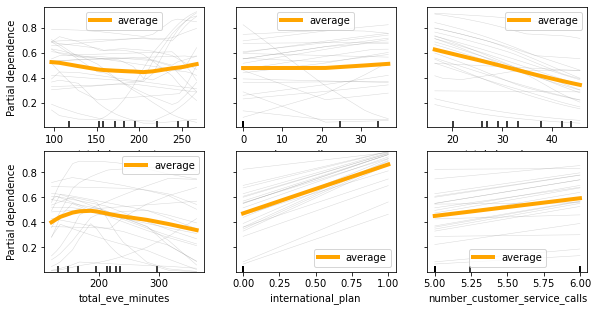

In [43]:

fig, ax = plt.subplots(figsize=(8, 4))
fig.tight_layout(pad=0.1)
ice = PartialDependenceDisplay.from_estimator(estimator=mlp,
                        X=sample_CSC,
                        features=[7,6,9,10,4,19],
                        target=0,
                        kind="both",
                        ice_lines_kw={"color":"#808080","alpha": 0.3, "linewidth": 0.5},
                        pd_line_kw={"color": "#ffa500", "linewidth": 4, "alpha":1},
                        # centered=True, # will be added in the future
                        ax=ax)

In [44]:
mlp = MLPClassifier(hidden_layer_sizes=(32, 16), batch_size=32, early_stopping=False, random_state=42)

mlp = mlp.fit(X_train[features_Sel], y_train)

In [ ]:
#mlp = MLPClassifier(hidden_layer_sizes=(32, 16), batch_size=32, early_stopping=False, random_state=42)
#mlp = mlp.fit(sample_CSC[features_Sel],sample_CSCX["Churn"])

In [45]:
explainer = explainer = shap.Explainer(mlp.predict, sample_CSC[features_Sel])
shap_values = explainer(sample_CSC[features_Sel])

In [ ]:
# feature importance for individual instances (and class)

#target = 1
#instance = 12

# inspect feature contributions for individual instances
#shap.plots._waterfall.waterfall_legacy(explainer.expected_value[target], shap_values[target][instance], feature_names=Churn_Test.columns)

# decision plot for individual instances
#shap.decision_plot(explainer.expected_value[target], shap_values[target][instance], Churn_Test)

#shap.force_plot(explainer.expected_value[target], shap_values[target][instance], Churn_Test.iloc[instance])

In [ ]:
#sample_Inter = Churn_Test.query("international_plan==1")

In [ ]:
# compute shap values for sample
#shap_values = explainer(sample_Inter[features_Sel])

In [ ]:
# global feature importance 
#shap.plots.bar(shap_values)
#shap.plots.beeswarm(shap_values)


In [ ]:
#Churn_Test

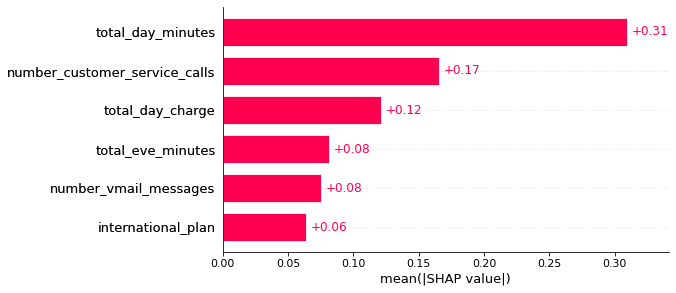

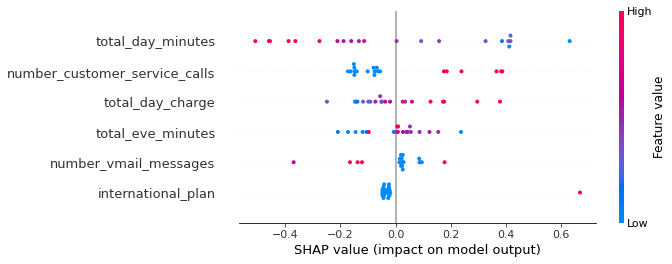

In [46]:
# global feature importance 
shap.plots.bar(shap_values)
shap.plots.beeswarm(shap_values)

In [ ]:
#sample_YoungCust= Churn_Test[Churn_Test["account_length"]<Churn_Test["account_length"].mean()]

In [ ]:
# compute shap values for sample
#shap_values = explainer(sample_YoungCust[features_Sel])

In [ ]:
# global feature importance 
#shap.plots.bar(shap_values)
#shap.plots.beeswarm(shap_values)

In [ ]:
#ample_CSC

In [ ]:
#X = X.iloc[:,2:]


In [ ]:
# compute shap values for sample
shap_values = explainer(sample_CSC[features_Sel])

In [ ]:
Churn_TestPred

In [ ]:
#Conclusion aplied to test


In [ ]:
Churn_TestPred["Churn"]=Churn_TestPred["Churn"].astype(str)
Total_ChurnersTest =  Churn_TestPred.groupby("Churn")["state"].count().reset_index()
Total_ChurnersTest 
fig, ax = plt.subplots()  
plt.bar(Total_ChurnersTest["Churn"], Total_ChurnersTest["state"])
plt.title("Total Churners")
plt.xlabel('is a churner')
